In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM


import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
Data=[[[(i+j)] for i in range(5)] for j in range(100)]                  
target=[(i+5) for i in range(100)]

In [3]:
data=np.array(Data,dtype=float)
target=np.array(target,dtype=float)

In [4]:
data.shape


(100, 5, 1)

In [5]:
data/=100
target/=100

In [6]:
x_train,x_test,y_train,y_test=train_test_split(data,target,test_size=0.2, random_state=4)

In [7]:
x_train[1]

array([[0.04],
       [0.05],
       [0.06],
       [0.07],
       [0.08]])

In [8]:
model=Sequential()
model.add(LSTM((1),batch_input_shape=(None,5,1),return_sequences=True))
model.add(LSTM((1),return_sequences=False))

In [9]:

model.compile(loss='mean_absolute_error',optimizer='adam',metrics=['accuracy'])

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 5, 1)              12        
_________________________________________________________________
lstm_2 (LSTM)                (None, 1)                 12        
Total params: 24
Trainable params: 24
Non-trainable params: 0
_________________________________________________________________


In [11]:
history=model.fit(x_train,y_train,epochs=100,validation_data=(x_test,y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 80 samples, validate on 20 samples
Epoch 1/100
80/80 [==============================] - 3s 34ms/step - loss: 0.6413 - acc: 0.0000e+00 - val_loss: 0.5233 - val_acc: 0.0000e+00
Epoch 2/100
80/80 [==============================] - 0s 399us/step - loss: 0.6386 - acc: 0.0000e+00 - val_loss: 0.5205 - val_acc: 0.0000e+00
Epoch 3/100
80/80 [==============================] - 0s 436us/step - loss: 0.6357 - acc: 0.0000e+00 - val_loss: 0.5176 - val_acc: 0.0000e+00
Epoch 4/100
80/80 [==============================] - 0s 411us/step - loss: 0.6329 - acc: 0.0000e+00 - val_loss: 0.5147 - val_acc: 0.0000e+00
Epoch 5/100
80/80 [==============================] - 0s 461us/step - loss: 0.6301 - acc: 0.0000e+00 - val_loss: 0.5118 - val_acc: 0.0000e+00
Epoch 6/100
80/80 [==============================] - 0s 449us/step - loss: 0.6273 - acc: 0.0000e+00 - val_loss: 0.5090 - val_acc: 0.0000e+00
Epoch 7/100
80/

Epoch 53/100
80/80 [==============================] - 0s 486us/step - loss: 0.5141 - acc: 0.0000e+00 - val_loss: 0.3928 - val_acc: 0.0000e+00
Epoch 54/100
80/80 [==============================] - 0s 436us/step - loss: 0.5117 - acc: 0.0000e+00 - val_loss: 0.3901 - val_acc: 0.0000e+00
Epoch 55/100
80/80 [==============================] - 0s 374us/step - loss: 0.5093 - acc: 0.0000e+00 - val_loss: 0.3873 - val_acc: 0.0000e+00
Epoch 56/100
80/80 [==============================] - 0s 411us/step - loss: 0.5068 - acc: 0.0000e+00 - val_loss: 0.3846 - val_acc: 0.0000e+00
Epoch 57/100
80/80 [==============================] - 0s 449us/step - loss: 0.5043 - acc: 0.0000e+00 - val_loss: 0.3818 - val_acc: 0.0000e+00
Epoch 58/100
80/80 [==============================] - 0s 424us/step - loss: 0.5019 - acc: 0.0000e+00 - val_loss: 0.3790 - val_acc: 0.0000e+00
Epoch 59/100
80/80 [==============================] - 0s 474us/step - loss: 0.4993 - acc: 0.0000e+00 - val_loss: 0.3761 - val_acc: 0.0000e+00
Epoch 

In [12]:
results=model.predict(x_test)

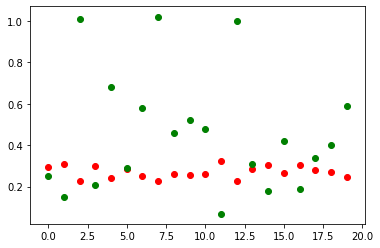

In [13]:
plt.scatter(range(20),results,c='r')
plt.scatter(range(20),y_test,c='g')
plt.show()

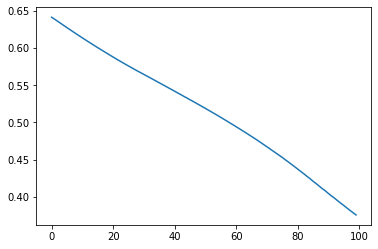

In [14]:
plt.plot(history.history['loss'])
plt.show()
